<a href="https://colab.research.google.com/github/MarioBolanos/DeepLearning/blob/main/PCA_reduction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons, make_circles
from sklearn.decomposition import KernelPCA
from scipy.spatial.distance import pdist, squareform

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

import keras

In [5]:
fashion_mnist= keras.datasets.fashion_mnist
(x_train_full, y_train_full),(X_test,y_test) = fashion_mnist.load_data()

# Load dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

print('Training samples: ', X_train.shape[0])
print('Test samples: ', X_test.shape[0])
print('Validation samples: ', X_valid.shape[0])

Training samples:  55000
Test samples:  10000
Validation samples:  5000


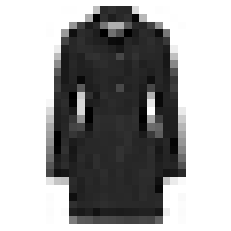

In [11]:
plt.imshow(X_train[7], cmap="binary")
plt.axis('off')
plt.show()

In [61]:
X_train_flatten = np.zeros((len(X_train_full),784))
for i in range(len(X_train_full)):
  X_train_flatten[i]= X_train_full[i].flatten()

X_train, X_test, y_train, y_test = train_test_split(X_train_flatten, y_train_full, test_size=0.3, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((42000, 784), (18000, 784), (42000,), (18000,))

(60000,)

In [62]:

# Estandarización de las características 
sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

# Component principal analysis 

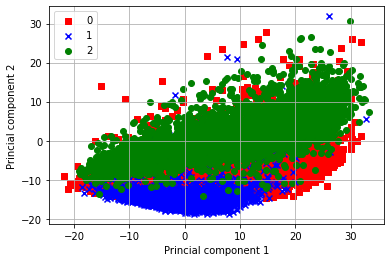

In [64]:
#lr = LogisticRegression()
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']


pca = PCA(n_components=2)
X_train_PCA_SK = pca.fit_transform(X_train_std)
X_test_PCA = pca.fit_transform(X_test_std)

#lr.fit(X_train_PCA, y_train)

for l, c, m in zip(np.unique(y_train), colors, markers):
  plt.scatter(X_train_PCA_SK[y_train==l, 0], X_train_PCA_SK[y_train==l, 1], c=c, label=l, marker=m)

plt.xlabel('Princial component 1')
plt.ylabel('Princial component 2')
plt.legend()
plt.grid()
plt.show()

#Kernel PCA

In [1]:
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=1.5)

X_KernelPCA = scikit_kpca.fit_transform(X_train_std)

plt.scatter(X_KernelPCA[y_2==0, 0], X_KernelPCA[y_2==0, 1], color='r', marker='^', alpha=0.5)
plt.scatter(X_KernelPCA[y_2==1, 0], X_KernelPCA[y_2==1, 1], color='b', marker='*', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

NameError: ignored

#LDA